In [1]:
import numpy as np
from scipy import optimize as opt
from matplotlib import pyplot as plt

# Problem 1, 3, 5

In [150]:
def newtons_method(f,f1,x0,tol=1e-5,maxiters=15,alpha=1):
    if np.isscalar(x0):
        for k in range(maxiters):
            x1 = x0-alpha*(f(x0)/f1(x0))
            if abs(x1-x0)<tol:
                converge=True
                break
            converge=False
            x0=x1
    else:
         for k in range(maxiters):
            m = 1e-10
            # Problem of Singular Matrix
            Dmat = f1(x0) + np.eye(f1(x0).shape[1])*m
            y = np.linalg.solve(Dmat,f(x0))
            x1 = x0-alpha*y
            if np.linalg.norm(x1-x0)<tol:
                converge=True
                break
            converge=False
            x0=x1
    return x1,converge,k+1

In [75]:
f=lambda x: np.exp(x)-2
f1 = lambda x:np.exp(x)
x0 = 0.5
print('Newton\'s Method Root:', newtons_method(f,f1,x0))
print('Actual Root:', opt.newton(f,x0))

f=lambda x: x**4-3
f1 = lambda x:4*x**3
x0 = 0.5
print('Newton\'s Method Root:', newtons_method(f,f1,x0))
print('Actual Root:', opt.newton(f,x0))

Newton's Method Root: (0.6931471805599454, True, 4)
Actual Root: 0.69314718056
Newton's Method Root: (1.3160740129524924, True, 11)
Actual Root: 1.316074012952492


# Problem 2

In [76]:
def find_r(N1,N2,P1,P2):
    r0 = 0.1
    f = lambda r: P1*((1+r)**N1 - 1)-P2*(1-(1+r)**(-N2))
    f1 = lambda r: P1*N1*((1+r)**(N1-1)) - P2*N2*((1+r)**(-N2-1))
    r = newtons_method(f,f1,r0)
    return r

In [77]:
N1 = 30
N2 = 20
P1 = 2000
P2 = 8000
print("R:", find_r(N1,N2,P1,P2)[0])

R: 0.03877843223027751


# Problem 3

In [78]:
f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
f1 = lambda x: np.sign(x) * (1/3)*np.power(np.abs(x),-2/3)
alpha = 1
x0 = 0.01
print('Newton\'s Method Root:', newtons_method(f,f1,x0,alpha=alpha))

alpha = 0.33
x0 = 0.01
print('Newton\'s Method Root:', newtons_method(f,f1,x0,maxiters=20,alpha=alpha))

Newton's Method Root: (-5368709.1199999908, False, 15)
Newton's Method Root: (9.9999999999982102e-09, True, 3)


# Problem 4

In [79]:
def plot_alpha(f,f1,x0,tol=1e-5,maxiters=15):
    alpha = np.linspace(0.1,1,20)
    iterations = np.empty_like(alpha)
    for k in range(len(alpha)):
        iterations[k] = newtons_method(f,f1,x0,tol=tol,maxiters=maxiters,alpha=alpha[k])[2]
    plt.plot(alpha,iterations)
    plt.xlabel('Alpha Values')
    plt.ylabel('Iterations')
    plt.show()
    alpha_min = alpha[np.argmin(iterations)]
    return alpha_min

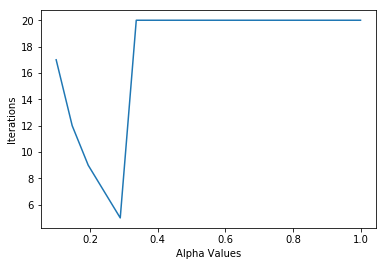

Ideal alpha: 0.289473684211


In [80]:
print('Ideal alpha:',plot_alpha(f,f1,x0,maxiters=20))

# Problem 6

In [145]:
def find_init(gamma=5,delta=1,tol=1e-5,maxiters=15):
    x = np.linspace(0,1,20)
    y = np.linspace(0,0.25,20)
    sol1 = np.array([0,1])
    sol2 = np.array([0,-1])
    sol3 = np.array([3.75,0.25])
    f = lambda v: np.array([gamma*v[0]*v[1]-v[0]*(1+v[1]),-v[0]*v[1]+(delta-v[1])*(1+v[1])])
    def f1(v):
        D = np.empty((2,2))
        D[0,:] = np.array([gamma*v[1]-(1+v[1]),gamma*v[0]-v[0]])
        D[1,:] = np.array([-v[1],-v[0]+delta-1-2*v[1]])
        return D
    for i in x:
        for j in y:
            x0 = np.array([i,j])
            guess, conv, it = newtons_method(f,f1,x0,tol=tol,maxiters=maxiters)
            if np.linalg.norm(guess-sol1)<tol or np.linalg.norm(guess-sol2)<tol:
                guess2, conv, it = newtons_method(f,f1,x0,tol=tol,maxiters=maxiters,alpha=0.55)
                if np.linalg.norm(guess2-sol3)<tol:
                    return x0
    print('Did not find solution')

In [147]:
print('Point of convergence:', find_init())

Point of convergence: [ 0.52631579  0.15789474]


# Problem 7

In [6]:
def complex(f,f1,roots,bounds,res,iters):
    x_real = np.linspace(bounds[0],bounds[1],res)
    x_imag = np.linspace(bounds[2],bounds[3],res)
    X_real, X_imag = np.meshgrid(x_real,x_imag)
    X_0 = X_real+1j*X_imag
    for k in range(iters):
        X_1 = X_0 - f(X_0)/f1(X_0)
        X_0 = X_1
    print(X_0)
    root_ind = np.vectorize(lambda x: np.argmin(np.abs(roots-x)))
    Y_0 = root_ind(X_0).astype(int)
    plt.pcolormesh(X_real,X_imag,Y_0,cmap='brg')
    plt.colorbar()
    plt.show()

[[-1.+0.j -1.+0.j -1.+0.j ...,  1.+0.j  1.+0.j  1.+0.j]
 [-1.+0.j -1.+0.j -1.+0.j ...,  1.+0.j  1.+0.j  1.+0.j]
 [-1.+0.j -1.+0.j -1.+0.j ...,  1.+0.j  1.+0.j  1.+0.j]
 ..., 
 [-1.+0.j -1.+0.j -1.+0.j ...,  1.+0.j  1.+0.j  1.+0.j]
 [-1.+0.j -1.+0.j -1.+0.j ...,  1.+0.j  1.+0.j  1.+0.j]
 [-1.+0.j -1.+0.j -1.+0.j ...,  1.+0.j  1.+0.j  1.+0.j]]


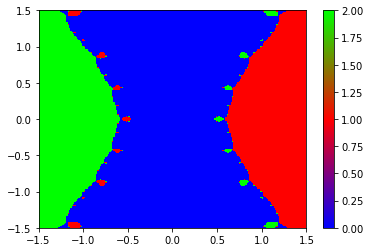

In [8]:
bounds = np.array([-1.5,1.5,-1.5,1.5])
iters = 20
res = 200

f = lambda x: x**3 - 1
f1 = lambda x: 3*x**2
roots = np.array([1,-0.5+1j*0.5*np.sqrt(3),-0.5-1j*0.5*np.sqrt(3)])
#complex(f,f1,roots,bounds,res,iters)

f = lambda x: x**3 - x
f1 = lambda x: 3*x**2 - 1
roots = np.array([0,1,-1])
complex(f,f1,roots,bounds,res,iters)